### Тематическое моделирование



Важно: Во второй половине ноутбука мы будем работать с библиотекой BigARTM, запускать которую локально может быьб удобнее с помощью Docker-образа. Если вы планируете работать с использованием Docker, сперва запустите его и работайте с ноутбуком внутри окружения, чтобы не делать предобработку данных дважды. Инструкция ниже.

Есть несколько сценариев работы с BigARTM, среди которых:
- установка библиотеки для Питона: инструкция [здесь]( https://bigartm.readthedocs.io/en/stable/installation/index.html)
- запуск Docker образа с библиотекой

Если вы предпочтете второй сценарий, вам нужно:
1. Скачать и установить Docker для своей ОС. Запустить Docker.
2. Скачать образ (Dockerfile), в котором устанавливается большинство библиотек для анализа данных, Jupyter Notebook и сама BigARTM: https://bigartm.readthedocs.io/en/stable/installation/docker.html?highlight=docker
3. Собрать образ: это можно сделать через командную строку (находясь в папке, где лежит скачанный в п.2 Dockerfile):

После выполнения этих двух команд запустится Jupyter Notebook, в командной строке будет написан путь к нему в таком формате:

Откройте любой из URL, там поднят Jupyter Notebook с уже установленными библиотеками.

При работе не забывайте, что все ноутбуки, которые вы создаете внутри этого Docker образа, исчезнут, как только вы остановите Docker, поэтому перед окончанием работы скачайте ноутбук с результатом себе на компьютер.

In [2]:
!pip install -q nltk

In [3]:
!pip install -q pymystem3

In [4]:
!pip install -q gensim

In [5]:
!pip install -q pyLDAvis==2.1.2 ## последние версии сложнее запустить в colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [6]:
!pip install -q bigartm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00


In [49]:
!pip install -q bertopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.5 MB/s eta 0:00:00


Построим тематические модели для корпуса новостей Lenta.ru, с которым мы уже работали ранее, добавим поля __date__ и __topic__.

In [7]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IMtWrTrs54SVzHlTgtBWqcQA990CCrQh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1IMtWrTrs54SVzHlTgtBWqcQA990CCrQh" -O lenta-ru-news-full.csv && rm -rf /tmp/cookies.txt

--2023-12-06 11:13:29--  https://docs.google.com/uc?export=download&confirm=t&id=1IMtWrTrs54SVzHlTgtBWqcQA990CCrQh
Resolving docs.google.com (docs.google.com)... 142.250.148.138, 142.250.148.100, 142.250.148.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.148.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e4rf7o0ri0kanc7qafuqbjvigd6pi9dn/1701861150000/14013181690233399305/*/1IMtWrTrs54SVzHlTgtBWqcQA990CCrQh?e=download&uuid=37b3a570-267c-43ee-b3f5-0aded12ea1fa [following]
--2023-12-06 11:13:29--  https://doc-0s-ac-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e4rf7o0ri0kanc7qafuqbjvigd6pi9dn/1701861150000/14013181690233399305/*/1IMtWrTrs54SVzHlTgtBWqcQA990CCrQh?e=download&uuid=37b3a570-267c-43ee-b3f5-0aded12ea1fa
Resolving doc-0s-ac-docs.googleusercontent.com (doc-0s-ac-docs.googleusercontent.com)... 142.250.1.13

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

data = pd.read_csv('lenta-ru-news-full.csv', usecols=['text', 'topic',  'date'], nrows = 10000) # ограничим размер 10,000 строк
data.sample(3)

,text,topic,date
9992,"Белорусская теннисистка Наталья Зверева оштрафована на $1000 после матча, в котором она играла в паре с Анной Курниковой против сестер Уильямс. Потерпев в этой игре поражение, Зверева продемонстрировала публике непристойный жест, сообщает Associated Press. По сообщению агентства, упомянутый жест представлял собой ""оттопыренные средние пальцы на обеих руках"". Арбитр Алан Миллз принял решение наказать белорусскую теннисистку за неспортивное поведение. Сумма штрафа будет вычтена из денег, заработанных Зверевой в ходе турнира.",Спорт,2000/07/10
542,"На состоявшемся в минувший вторник заседании Мосгорсуд отменил определение районного суда, которое выдвигало особое условие, препятствующее выплате денег пострадавшим от деятельности российского филиала японской секты ""Аум синрике"". Дело направлено на новое рассмотрение. Как сообщает ИТАР-ТАСС, ранее Генпрокуратура признала потерпевшими 26 жителей России и стран СНГ, которым был нанесен вред здоровью, а также материальный и моральный ущерб. Среди них - бывшие члены секты, которым требуется психологическая реабилитация; семьи, лишившиеся кормильца; лица, пожертвовавшие секте все свое имущество; родители, чьи дети покончили жизнь самоубийством. Тяжба о выплате материальной компенсации жертвам секты тянется четыре года. Общественная организация ""Комитет по спасению молодежи от деструктивных культов"" добивается выполнения решения Останкинского межмуниципального суда, принятого 18 апреля 1995 года, по перечислению на ее счет денежной суммы для выплаты потерпевшим. Тогда суд постановил взыскать с российского филиала секты для возмещения вреда пострадавшим 20 миллиардов рублей (за четыре года эта сумма превратилась в 2,435 миллиона рублей). Адвокат ""Комитета по спасению молодежи от деструктивных культов"" выразил надежду, что, возможно, после решения Мосгорсуда юридическая волокита закончится.",Россия,1999/09/29
4983,"Во вторник утром на шахте №5/6 АО ""Прокопьевскуголь"" в Кузбассе произошел взрыв метана. Как сообщили РИА ""Новости"" в пресс-службе МЧС РФ, в результате один человек погиб и шестеро госпитализированы с различными ранениями. Еще четверо шахтеров, работавших в момент взрыва в шахте, не пострадали. По данным РБК, под землей в это время находились 72 шахтера, из них 11 - в непосредственной близости к эпицентру взрыва. В областную травматологическую больницу госпитализированы семь человек, сообщает агентство. К настоящему моменту все люди из шахты эвакуированы, а работы на ней приостановлены до выяснения причин взрыва. Около 30 горноспасателей сейчас занимаются исследованием горных выработок. Пожара в шахте нет. Накануне, 6 марта, на нерабочем участке этой же шахты - ввентиляционном стволе - горноспасатели обнаружили тела четырех подростков, погибших от отравления газом.",Россия,2000/03/07


In [11]:
len(data)

10000

In [12]:
data.topic.value_counts().head(15)

Россия            5135
Мир               2018
Экономика         1545
Интернет и СМИ     937
Спорт              360
Библиотека           5
Name: topic, dtype: int64

Для ускорения вычислений оставим тексты из 5 тем:

In [13]:
topics = ['Россия', 'Мир', 'Спорт', 'Экономика', 'Интернет и СМИ']

data = data[data.topic.isin(topics)]
data.dropna(inplace=True)
len(data)

9995

### Предобработка


Все модели, с которыми мы будем работать далее, работают с предобработанными текстами, поэтому сперва проведем стандартную предобработку текста:

In [14]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


mystem = Mystem()
stopwords_list = stopwords.words('russian')

def lemmatize(words, lemmer = mystem, stopwords = stopwords_list):
    lemmas = lemmer.lemmatize(' '.join(words))
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [17]:
data.text.iloc[1]

'В зале игровых автоматов в третьем ярусе подземного комплекса "Охотный ряд" на Манежной площади в центре Москвы около 20.00 прогремел мощный взрыв. По данным ФСБ, погибли не менее четырех человек, 20 человек ранены. Однако уточненная оценка числа пострадавших в результате этого взрыва может достигнуть ста человек. Агентство ИТАР-ТАСС, в сообщении от 21.15 со ссылкой на источники в ГУВД Москвы, говорит только о 30 раненых, в том числе о двух пострадавших в тяжелом состоянии. Однако число пострадавших в результате этого взрыва может составить до ста человек. По данным РИА "Новости", Боткинская больница, Институт им. Склифосовского, 1-ая Градская, 36-ая и 64-ая горбольница работают только на прием пострадавших. С места происшествия запросили 20 машин скорой помощи. Из торгового центра эвакуированы все посетитетели. Среди причин происшедшего называют террористический акт, связанный с последними событиями в Дагестане, однако, по сообщению ОРТ, не исключается и версия об аварии (взорвался и

In [18]:
print(*preprocess(data.text.iloc[1]), sep=', ')

зал, игровой, автомат, третий, ярус, подземный, комплекс, охотный, ряд, манежный, площадь, центр, москва, около, прогреметь, мощный, взрыв, данные, фсб, погибать, мало, четыре, человек, человек, ранить, однако, уточнять, оценка, число, пострадать, результат, взрыв, мочь, достигать, сто, человек, агентство, итар, тасс, сообщение, ссылка, источник, гувд, москва, говорить, раненый, число, пострадавший, тяжелый, состояние, однако, число, пострадать, результат, взрыв, мочь, составлять, сто, человек, данные, риа, новость, боткинский, больница, институт, склифосовский, градский, горбольница, работать, прием, пострадавший, место, происшествие, запрашивать, машина, скорый, помощь, торговый, центр, эвакуировать, посетитетель, среди, причина, происходить, называть, террористический, акт, связывать, последний, событие, дагестан, однако, сообщение, орт, исключаться, версия, авария, взрываться, игровой, автомат, точный, данный, прична, взрыв, количество, жертва, представитель, уфсб, называть, торопи

In [19]:
preprocessed_text = list(tqdm(map(preprocess, data['text']), total=len(data)))

  0%|          | 0/9995 [00:00<?, ?it/s]

In [20]:
data['text'] = preprocessed_text
data.sample(3)

,text,topic,date
2869,"[декабрь, президиум, московский, городской, суд, удовлетворять, протест, генеральный, прокуратура, отменять, решение, хамовнический, суд, также, судебный, коллегия, уголовный, дело, московский, городской, суд, признание, незаконный, продление, срок, следствие, дело, юрий, скуратов, шесть, месяц, это, сообщать, агентство, риа, новость, решение, президиум, мосгорсуд, вопрос, законность, продолжение, расследование, повторно, рассматриваться, хамовнический, межмуниципальный, суд, москва, близкий, время, генеральный, прокуратура, возобновлять, следственный, действие, дело, юрий, скуратов, заявлять, журналист, заместитель, генеральный, прокурор, александр, розанов, очень, важный, принятие, решение, становиться, счесть, мосгорсуд, хамовнический, суд, иметь, право, принимать, производство, жалоба, юрий, скуратов, розанов, пояснять, соответствие, уголовный, процессуальный, кодекс, действие, прокурор, следователь, мочь, обжаловать, лишь, подозреваемый, обвиняемый, гражданский, истец, гражданский, ответчик, ...]",Россия,1999/12/23
9528,"[среда, космодром, плесецк, стартовать, ракета, носитель, легкий, класс, космос, который, вывести, спутник, солнечно, синхронный, орбита, максимальный, удаление, земля, километр, сообщать, риа, новость, пресс, служба, ракетный, войско, стратегический, назначение, ранее, подобный, запуск, осуществляться, космодром, байконур, космос, доставлять, российский, спутник, надежда, предназначать, работа, международный, космический, система, поиск, спасение, аварийный, суд, самолет, коспас, sarsat, иностранный, космический, аппарат, китайский, цинхуа, английский, snap, который, использоваться, проведение, научный, исследование, обучение, студент, слово, специалист, рвсн, разделение, спутник, происходить, штатный, режим, примерно]",Россия,2000/06/28
6686,"[балтийский, море, вторник, начинаться, крупный, российский, военный, морской, учение, участвовать, сухопутный, береговой, войско, надводный, корабль, авиация, учение, впервые, принимать, участие, подводный, лодка, новый, боевой, судно, лишь, несколько, месяц, назад, входить, состав, балтийский, флот, передавать, нтв, это, ракетный, катер, корабль, воздушный, подушка, самум, предполагаться, проведение, ракетный, стрельба, торпедный, стрельба, наблюдение, ход, учение, калининградский, область, прибывать, делегация, генеральный, штаб, глава, начальник, управление, боевой, подготовка, вмс, вица, адмирал, николай, михеев, случай, зона, учение, курсировать, иностранный, разведывательный, корабль]",Россия,2000/04/18


## Модель LDA


Первая модель, которую мы рассмотрим, LDA - латентное размещение Дирихле. Воспользуемся реализацией из библиотеки gensim.

In [21]:
from gensim.models import *
from gensim import corpora

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [22]:
dictionary = corpora.Dictionary(data['text'])

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или в более 90% документов
dictionary.save('lenta.dict')

In [31]:
#help(dictionary.filter_extremes)

Векторизуем документы:

In [23]:
corpus = [dictionary.doc2bow(text) for text in data['text']]
corpora.MmCorpus.serialize('lenta.model', corpus)

Теперь можем обучать модель:

In [24]:
%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

CPU times: user 19.8 s, sys: 56.2 ms, total: 19.9 s
Wall time: 20.6 s


In [34]:
#help(ldamodel.LdaModel)

Посмотрим на получившиеся темы:

In [25]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(19,
  '0.029*"россия" + 0.019*"российский" + 0.014*"который" + 0.014*"это" + 0.013*"министр" + 0.013*"президент" + 0.012*"также" + 0.012*"новость" + 0.012*"сообщать" + 0.012*"правительство"'),
 (2,
  '0.027*"человек" + 0.019*"который" + 0.018*"происходить" + 0.017*"сообщать" + 0.016*"место" + 0.015*"результат" + 0.015*"находиться" + 0.015*"время" + 0.014*"погибать" + 0.011*"несколько"'),
 (14,
  '0.091*"акция" + 0.058*"украина" + 0.043*"нью" + 0.041*"договор" + 0.034*"поражение" + 0.032*"протест" + 0.030*"правление" + 0.027*"прокурор" + 0.026*"участник" + 0.025*"ответственность"'),
 (13,
  '0.040*"президент" + 0.033*"депутат" + 0.029*"госдума" + 0.021*"совет" + 0.020*"глава" + 0.020*"администрация" + 0.019*"председатель" + 0.019*"владимир" + 0.019*"федерация" + 0.014*"лидер"'),
 (0,
  '0.100*"компания" + 0.062*"интернет" + 0.044*"который" + 0.042*"система" + 0.027*"новый" + 0.022*"пользователь" + 0.020*"милиционер" + 0.020*"электронный" + 0.019*"программа" + 0.017*"рынок"'),
 (5,
  '

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки __pyLDAvis__. Чтобы спроецировать темы на плоскость, внутри применяется PCA-разложение.

In [26]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

CPU times: user 3.53 s, sys: 145 ms, total: 3.68 s
Wall time: 7.23 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность:

In [37]:
#ppl = lda.log_perplexity(corpus)

print('Log_perplexity:', '{:.10f}'.format(ppl))
print('Персплексия:', '{:.10f}'.format(2**ppl))

Log_perplexity: -13.8955850568
Персплексия: 0.0000656164


Перплексия модели (второе значение) лежит в пределах от 0 до |V| (размера корпуса в словах), идеальная перпслекия = 0.

In [39]:
#help(lda.log_perplexity)

In [40]:
coherence_model_lda = CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', '{:.5f}'.format(coherence_lda))

Средняя когерентность:  0.39115


Чем больше значение когерентности, тем более интерпретируемые темы получились.

Теперь можно подобрать оптимальное количество тем, опираясь на значение метрик:

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/5 [00:00<?, ?it/s]

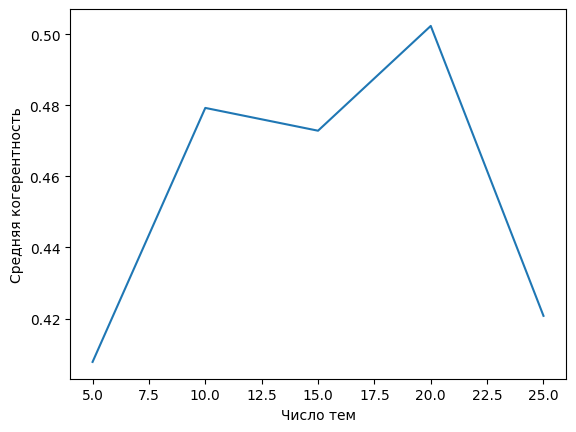

In [42]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=data['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [43]:
lda_10 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_10, corpus, dictionary)
pyLDAvis.display(vis_data)

### Библиотека BigARTM

Теперь попробуем построить модели с помощью библиотеки BigARTM. [Тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_example_RU.ipynb) и [тут](https://github.com/bigartm/bigartm-book/blob/master/ARTM_tutorial_RU.ipynb) можно посмотреть на примеры использования библиотеки.

In [44]:
import artm

Чтобы работать с данными в библиотеке ARTM нужно сперва сделать препроцессинг (мы уже сделали его ранее) и записать данные в [одном из форматов](https://bigartm.readthedocs.io/en/v0.10.1/tutorials/datasets.html), с которыми умеет работать библиотека. Мы конвертируем данные в формат vowpal wabbit:

In [45]:
i = 0
d = data.iloc[i]
d

text     [становиться, известно, агентство, ассошиэйтед, пресс, экипаж, последний, экспедиция, станция, мир, считать, способный, выходить, контроль, командир, виктор, афанасьев, сказать, чувствовать, грустить, оставлять, станция, летать, беспилотный, режим, gazeta, подробно, писать, финансирование, программа, мир, закрывать, конструктор, спешить, топить, тихий, океан, надеяться, изыскание, внебюджетный, средство, надеяться, правительство, оплачивать, финальный, экспедиция, мир, февраль, март, год, новый, экспедиция, должный, постепенно, перевести, станция, низкий, орбита, тонный, мир, основной, сгорать, атмосфера, незначительный, часть, упасть, тихий, океан, никакой, гарантия, переживать, столько, отказ, оборудование, конструкция, поводить, адекватно, команда, афанасьев, перечислять, потенциально, опасный, элемент, мир, пресс, конференция, состояться, понедельник, звездный, городок, мочь, упасть, давление, кабина, сказать, это, становиться, серьезный, препятствие, работа, ...]
topic   

In [46]:
f'doc{i} {" ".join(d.text)} |topic {d.topic}'

'doc0 становиться известно агентство ассошиэйтед пресс экипаж последний экспедиция станция мир считать способный выходить контроль командир виктор афанасьев сказать чувствовать грустить оставлять станция летать беспилотный режим gazeta подробно писать финансирование программа мир закрывать конструктор спешить топить тихий океан надеяться изыскание внебюджетный средство надеяться правительство оплачивать финальный экспедиция мир февраль март год новый экспедиция должный постепенно перевести станция низкий орбита тонный мир основной сгорать атмосфера незначительный часть упасть тихий океан никакой гарантия переживать столько отказ оборудование конструкция поводить адекватно команда афанасьев перечислять потенциально опасный элемент мир пресс конференция состояться понедельник звездный городок мочь упасть давление кабина сказать это становиться серьезный препятствие работа следующий экспедиция слишком большой роль человеческий фактор элементарный ошибка мочь приводить потеря топливо потер

In [47]:
def convert_to_vw_format(index, row):
    return f'doc{index} {" ".join(row.text)} |topic {row.topic}'

In [69]:
with open('lenta_wv.wv', 'w') as f:
    for index, row in data.iterrows():
        vw_string = convert_to_vw_format(index, row)
        f.write(vw_string)
        f.write('\n')

Далее нужно создать объект BatchVectorizer для данных, которые мы записали в формате vowpal wabbit:

In [70]:
batch_vectorizer = artm.BatchVectorizer(data_path='lenta_wv.wv',
                                        data_format='vowpal_wabbit',
                                        target_folder='lenta_batches')

Попробуем обучить модель LDA для 10 тем:

In [71]:
%%time
lda = artm.LDA(num_topics=10, alpha=0.1, beta=0.001,
               cache_theta=True,
               num_document_passes=5,
               dictionary=batch_vectorizer.dictionary)

lda.fit_offline(batch_vectorizer=batch_vectorizer,
                num_collection_passes=10)

CPU times: user 29.4 s, sys: 313 ms, total: 29.7 s
Wall time: 19.6 s


- __fit_offline__ (офлайн алгоритм): много проходов по коллекции, один проход по документу, одно обновление матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с небольшой коллекцией__.


- __fit_online__ (онлайн алгоритм) : один проход по коллекции, несколько проходов по документу, несколько обновлений матрицы $\Phi$ в конце прохода по коллекции. __Лучше использовать при работе с большой коллекцией, или коллекцией с часто меняющимеся темами.__



Можем посмотреть на все значения перплексии (для каждой итерации по коллекции из num_collection_passes=10):

In [72]:
lda.perplexity_value

[49334.46875,
 4345.82666015625,
 3892.929931640625,
 3221.296630859375,
 2751.091796875,
 2520.399658203125,
 2405.1904296875,
 2337.60986328125,
 2294.09716796875,
 2264.379638671875]

In [73]:
import numpy as np

In [74]:
np.log(lda.perplexity_last_value)

7.725056110191268

Посмотрим на топ-10 токенов для каждой из тем:

In [75]:
top_tokens = lda.get_top_tokens(num_tokens=10)
for i, token_list in enumerate(top_tokens):
     print ('Topic #{0}: {1}'.format(i, token_list))

Topic #0: ['компания', 'процент', 'акция', 'год', 'сша', 'доллар', 'который', 'индекс', 'рынок', 'свой']
Topic #1: ['год', 'доллар', 'миллион', 'свой', 'который', 'тысяча', 'сообщать', 'мир', 'клуб', 'это']
Topic #2: ['который', 'свой', 'весь', 'человек', 'это', 'время', 'сообщать', 'сказать', 'олимпийский', 'мочь']
Topic #3: ['матч', 'первый', 'команда', 'второй', 'сборная', 'чемпионат', 'который', 'турнир', 'свой', 'место']
Topic #4: ['год', 'доллар', 'миллион', 'россия', 'банк', 'миллиард', 'российский', 'суд', 'долг', 'который']
Topic #5: ['компания', 'россия', 'который', 'сообщать', 'директор', 'президент', 'российский', 'это', 'совет', 'свой']
Topic #6: ['который', 'год', 'свой', 'это', 'весь', 'команда', 'заявлять', 'новый', 'сказать', 'концерт']
Topic #7: ['год', 'процент', 'рубль', 'доллар', 'нефть', 'россия', 'цена', 'сообщать', 'составлять', 'страна']
Topic #8: ['фильм', 'год', 'режиссер', 'роль', 'который', 'картина', 'фестиваль', 'главный', 'свой', 'хороший']
Topic #9: ['г

[Более подробный ноутбук про модель LDA](https://github.com/bigartm/bigartm-book/blob/master/LDA_tutorial_RU.ipynb)

Теперь построим базовую модель pLSA:

In [76]:
plsa = artm.ARTM(num_topics=10,
                 dictionary=batch_vectorizer.dictionary)

Добавим расчет перплексии:

In [77]:
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                 dictionary=batch_vectorizer.dictionary))

И TopTokensScore, чтобы взглянуть на самые вероятные слова в каждой теме:

In [78]:
plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6))

In [79]:
plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                 num_collection_passes=20)

In [80]:
plsa.score_tracker['lenta_perplexity_score'].value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[48730.21875,
 4177.1318359375,
 3475.912353515625,
 2818.471435546875,
 2519.5185546875,
 2388.373291015625,
 2316.196044921875,
 2271.542724609375,
 2241.67138671875,
 2220.335693359375,
 2204.4912109375,
 2192.273193359375,
 2182.108642578125,
 2173.490966796875,
 2166.072021484375,
 2159.654541015625,
 2153.789794921875,
 2148.32861328125,
 2143.55419921875,
 2139.44140625]

In [81]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['компания', 'процент', 'доллар', 'год', 'сша', 'акция']
topic_1:  ['год', 'который', 'музей', 'тысяча', 'свой', 'это']
topic_2:  ['который', 'свой', 'это', 'человек', 'весь', 'время']
topic_3:  ['матч', 'первый', 'команда', 'второй', 'сборная', 'чемпионат']
topic_4:  ['доллар', 'год', 'россия', 'миллион', 'банк', 'миллиард']
topic_5:  ['компания', 'директор', 'который', 'россия', 'сообщать', 'президент']
topic_6:  ['который', 'свой', 'год', 'команда', 'весь', 'это']
topic_7:  ['год', 'процент', 'рубль', 'нефть', 'цена', 'составлять']
topic_8:  ['фильм', 'режиссер', 'год', 'роль', 'который', 'главный']
topic_9:  ['россия', 'правительство', 'проект', 'сообщать', 'год', 'который']


Обратите внимание на слова с заглавной буквы: это поле topic из оригинальных данных.

Попробуем удалить из словаря слишком редкие и слишком частые токены:

In [82]:
batch_vectorizer.dictionary.filter(min_tf=10, max_tf=5000)

artm.Dictionary(name=59930fb7-71fd-4be8-bff8-8a8ec1965431, num_entries=9944)

In [84]:
plsa = artm.ARTM(num_topics=10,
                 dictionary=batch_vectorizer.dictionary)
plsa.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

plsa.scores.add(artm.TopTokensScore(name='TopTokensScore',
                                    num_tokens=6))
plsa.fit_offline(batch_vectorizer=batch_vectorizer,
                 num_collection_passes=20)

In [85]:
plsa.score_tracker['lenta_perplexity_score'].value

[8789.455078125,
 2779.507080078125,
 2353.55517578125,
 1912.46435546875,
 1691.0028076171875,
 1584.080078125,
 1527.3642578125,
 1494.6923828125,
 1474.0860595703125,
 1460.140380859375,
 1449.95263671875,
 1442.2021484375,
 1436.402099609375,
 1431.9168701171875,
 1428.3013916015625,
 1425.227783203125,
 1422.4620361328125,
 1419.9444580078125,
 1417.6612548828125,
 1415.54296875]

Стало заметно лучше :)

In [86]:
for topic_name in plsa.topic_names:
    print (topic_name + ': ', plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['процент', 'компания', 'цена', 'составлять', 'сша', 'рынок']
topic_1:  ['матч', 'команда', 'клуб', 'сборная', 'игра', 'минута']
topic_2:  ['роль', 'режиссер', 'актер', 'главный', 'the', 'снимать']
topic_3:  ['первый', 'турнир', 'второй', 'место', 'российский', 'выигрывать']
topic_4:  ['миллион', 'российский', 'миллиард', 'банк', 'долг', 'страна']
topic_5:  ['компания', 'директор', 'предприятие', 'президент', 'акция', 'рао']
topic_6:  ['нефть', 'заявлять', 'решение', 'баррель', 'страна', 'суд']
topic_7:  ['рубль', 'правительство', 'процент', 'бюджет', 'налог', 'закон']
topic_8:  ['фестиваль', 'театр', 'премия', 'москва', 'известный', 'российский']
topic_9:  ['город', 'тысяча', 'музей', 'передавать', 'время', 'весь']


__Мультимодальные модели__

В библиотеке ARTM можно обучать мультимодальные модели, например, давайте попробуем обучить модель, которая будет учитывать поле topic из наших данных (мы специально записали его отдельно через | )

In [87]:
# описываем модель и задаем веса классов
martm = artm.ARTM(num_topics=20,
                  class_ids={'@default_class': 1.0, '@topic': 5.0},
                  dictionary=batch_vectorizer.dictionary)

Добавим расчет метрик и регуляризаторы:

In [88]:
martm.scores.add(artm.SparsityPhiScore(name='sparsity_phi_score',
                                       class_id='@topic'))

martm.scores.add(artm.TopTokensScore(name='TopTokensScore',
                                     num_tokens=6))


martm.scores.add(artm.PerplexityScore(name='lenta_perplexity_score',
                dictionary=batch_vectorizer.dictionary))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_def',
                    class_ids=['@default_class']))

martm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorrelator_phi_lab',
                        class_ids=['@topic']))

In [89]:
martm.fit_offline(batch_vectorizer=batch_vectorizer,
                  num_collection_passes=10)

In [91]:
for topic_name in martm.topic_names:
    print (topic_name + ': ', martm.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['компания', 'акция', 'процент', 'рынок', 'курс', 'индекс']
topic_1:  ['команда', 'клуб', 'матч', 'игрок', 'сборная', 'тренер']
topic_2:  ['человек', 'группа', 'весь', 'песня', 'летний', 'концерт']
topic_3:  ['мир', 'принимать', 'участие', 'япония', 'весь', 'чемпион']
topic_4:  ['миллиард', 'банк', 'миллион', 'долг', 'сумма', 'рубль']
topic_5:  ['москва', 'фестиваль', 'премия', 'московский', 'александр', 'российский']
topic_6:  ['заявлять', 'дело', 'президент', 'новый', 'слово', 'глава']
topic_7:  ['правительство', 'закон', 'бюджет', 'налог', 'федеральный', 'рубль']
topic_8:  ['картина', 'театр', 'известный', 'художник', 'выставка', 'писатель']
topic_9:  ['музей', 'передавать', 'век', 'город', 'центр', 'президент']
topic_10:  ['компания', 'предприятие', 'рао', 'акция', 'директор', 'еэс']
topic_11:  ['сша', 'страна', 'евро', 'американский', 'экономика', 'экономический']
topic_12:  ['роль', 'сыграть', 'режиссер', 'съемка', 'главный', 'сценарий']
topic_13:  ['режиссер', 'хороший

## [BERTopic](https://huggingface.co/blog/bertopic)



In [51]:
from bertopic import BERTopic

Заново загрузим датасет:

In [100]:
data = pd.read_csv('lenta-ru-news-full.csv', usecols=['text', 'topic',  'date'])
topics = ['Россия', 'Мир', 'Спорт', 'Экономика', 'Интернет и СМИ']

data = data[data.topic.isin(topics)].sample(5000)

data.sample()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,text,topic,date
547569,"За первые четыре месяца 2015 года россияне потратили на покупку новых автомобилей 575,7 миллиарда рублей, что на 25 процентов меньше, чем за аналогичный период прошлого года (764,7 миллиарда рублей). Об этом «Ленте.ру» сообщили в аналитическом агентстве «Автостат». В целом продажи снизились на 38 процентов до 487,6 тысячи машин. При этом средняя цена одного купленного автомобиля выросла на 21 процент, до 1,18 миллиона рублей. Иномарки подорожали на 24,5 процента, до 1,35 миллиона, отечественные машины — на 14,9 процента, до 482 тысяч рублей. Больше всего было продано автомобилей Lada — 89 411 штук (выручка составила 41,3 миллиарда рублей). На втором месте Hyundai с 53 326 проданными машинами (выручка — 46,5 миллиарда рублей), на третьем — Kia (49 932 штуки, 44,1 миллиарда рублей). По данным Ассоциации европейского бизнеса (АЕБ), в апреле продажи легковых автомобилей в России упали на 40 процентов по сравнению с аналогичным месяцем 2014 года. Всего удалось реализовать 132 тысячи машин — худший результат за последние десять лет. Кроме того, в первом квартале 2015 года импорт автомобилей в РФ снизился почти в два раза, до 87,3 тысячи штук.",Экономика,2015/05/25


In [117]:
docs = data['text'].values

Загрузим модель для русского языка:

In [104]:
topic_model = BERTopic(language="russian", verbose=True)

In [76]:
#help(BERTopic)

In [62]:
#help(topic_model.fit_transform)

In [105]:
%time topics, probs = topic_model.fit_transform(docs)

2023-12-06 13:05:01,971 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2023-12-06 13:07:37,881 - BERTopic - Embedding - Completed ✓
2023-12-06 13:07:37,884 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-06 13:07:44,002 - BERTopic - Dimensionality - Completed ✓
2023-12-06 13:07:44,007 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-06 13:07:44,056 - BERTopic - Cluster - Completed ✓
2023-12-06 13:07:44,063 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-06 13:07:44,682 - BERTopic - Representation - Completed ✓


CPU times: user 2min 32s, sys: 4.57 s, total: 2min 36s
Wall time: 2min 43s


In [106]:
inf = topic_model.get_topic_info()
inf[['Topic', 'Count', 'Name', 'Representation']]

,Topic,Count,Name,Representation
0,-1,255,-1_на_что_по_не,"[на, что, по, не, как, из, его, за, сша, россии]"
1,0,103,0_на_по_чечни_что,"[на, по, чечни, что, не, боевиков, он, из, россии, как]"
2,1,102,1_интернет_на_что_2000,"[интернет, на, что, 2000, по, сша, для, года, не, как]"
3,2,89,2_на_по_для_что,"[на, по, для, что, за, рублей, не, как, граждан, москвы]"
4,3,50,3_кандидатов_цик_блока_лдпр,"[кандидатов, цик, блока, лдпр, что, по, на, выборах, не, списка]"
5,4,41,4_на_за_нефть_нефти,"[на, за, нефть, нефти, цен, цены, по, тонну, доллара, рублей]"
6,5,31,5_на_улице_из_по,"[на, улице, из, по, дома, не, сотрудники, устройство, что, взрывное]"
7,6,31,6_суд_по_на_что,"[суд, по, на, что, не, его, решение, суда, делу, дело]"
8,7,31,7_взрыва_на_по_взрыв,"[взрыва, на, по, взрыв, произошел, пожар, не, как, результате, дома]"
9,8,28,8_президента_рао_что_тюменьэнерго,"[президента, рао, что, тюменьэнерго, россии, главы, еэс, он, на, по]"


In [123]:
topic_model.get_topic(14)

[('nasa', 0.035264090151416974),
 ('на', 0.03176761636083491),
 ('орбиту', 0.029520609235509865),
 ('станции', 0.02248463599457192),
 ('что', 0.0210403495505839),
 ('mars', 0.02058706101873802),
 ('запуск', 0.020346356240163302),
 ('космодрома', 0.020346356240163302),
 ('по', 0.019098219537429607),
 ('space', 0.019003440940373553)]

In [107]:
topic_model.visualize_topics()

Можно использовать другой алгоритм кластеризации в пайплайне:

In [124]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=10)
topic_model_kmeans = BERTopic(hdbscan_model=cluster_model, language='russian', verbose=True)

topics_kmeans, probs_kmeans = topic_model_kmeans.fit_transform(docs)

2023-12-06 13:20:47,101 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2023-12-06 13:32:20,120 - BERTopic - Embedding - Completed ✓
2023-12-06 13:32:20,123 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-06 13:33:03,190 - BERTopic - Dimensionality - Completed ✓
2023-12-06 13:33:03,192 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-06 13:33:03,865 - BERTopic - Cluster - Completed ✓
2023-12-06 13:33:03,874 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-06 13:33:06,284 - BERTopic - Representation - Completed ✓


In [125]:
inf = topic_model_kmeans.get_topic_info()
inf[['Topic', 'Count', 'Name', 'Representation']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name,Representation
0,0,809,0_на_по_что_года,"[на, по, что, года, процента, за, до, долларов, не, процентов]"
1,1,735,1_на_что_по_не,"[на, что, по, не, россии, как, он, года, за, из]"
2,2,626,2_на_по_сборной_мира,"[на, по, сборной, мира, что, не, за, команды, россии, из]"
3,3,614,3_на_по_что_из,"[на, по, что, из, не, его, был, как, он, сообщает]"
4,4,457,4_на_что_по_не,"[на, что, по, не, как, для, из, за, года, также]"
5,5,447,5_по_что_на_не,"[по, что, на, не, суд, его, года, он, был, как]"
6,6,385,6_на_по_из_человек,"[на, по, из, человек, результате, не, сообщает, что, данным, как]"
7,7,370,7_сша_что_на_по,"[сша, что, на, по, не, как, из, заявил, за, для]"
8,8,345,8_на_аль_что_по,"[на, аль, что, по, из, не, как, сша, сообщает, за]"
9,9,212,9_на_что_по_из,"[на, что, по, из, самолет, не, самолета, борту, как, авиакомпании]"


In [126]:
topic_model_kmeans.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



У BERTopic есть множество модификаций, в частности, можно построить модель с учетом времени:

In [130]:
timestamps = data['date'].values

max(timestamps), min(timestamps)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



('2018/12/13', '1999/09/13')

In [131]:
topics_over_time = topic_model_kmeans.topics_over_time(docs, timestamps, nr_bins=10, datetime_format="%Y/%m/%d")

10it [00:11,  1.18s/it]


In [92]:
#help(topic_model.topics_over_time)

In [132]:
topic_model_kmeans.visualize_topics_over_time(topics_over_time)